<a href="https://colab.research.google.com/github/nouranali/DataCamp-projects/blob/master/Machathon_competetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machathon Competetion dataset from raisa energy**
Was requested to predict the oil produced in 6 months given a well data like id, production through 6 months and days it was operating

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
df=pd.read_csv('train.csv')

In [212]:
df.head(10)

,Unnamed: 0,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalOilInNext6Months,TotalGasInNext6Months
0,3,5343,22672.0,3818.0,0.168402,14759.0,0.650979,30.0,12766.0,2308.0,0.180793,7921.0,0.620476,28.0,4990.0,607.0,0.121643,2330.0,0.466934,10.0,11002.0,1419.0,0.128977,6576.0,0.597710,31.0,7141.0,506.0,0.070858,4451.0,0.623302,22.0,6516.0,479.0,0.073511,4075.0,0.625384,27.0,61152.0,5893.0
1,4,5663,7919.0,4328.0,0.546534,5278.0,0.666498,20.0,5082.0,2779.0,0.546832,2402.0,0.472649,28.0,3168.0,540.0,0.170455,1683.0,0.531250,25.0,2774.0,283.0,0.102019,1172.0,0.422495,30.0,1925.0,378.0,0.196364,782.0,0.406234,24.0,2015.0,1195.0,0.593052,796.0,0.395037,23.0,13172.0,7529.0
2,8,7697,18653.0,0.0,0.000000,9585.0,0.513858,30.0,13372.0,23154.0,1.731529,0.0,0.000000,31.0,12189.0,19935.0,1.635491,3665.0,0.300681,30.0,10034.0,16316.0,1.626071,2913.0,0.290313,31.0,11982.0,23337.0,1.947672,4137.0,0.345268,30.0,9070.0,18020.0,1.986770,3102.0,0.342007,31.0,32858.0,57060.0
3,9,7394,19784.0,33837.0,1.710321,9433.0,0.476799,30.0,17166.0,27167.0,1.582605,6641.0,0.386869,31.0,16525.0,22777.0,1.378336,5927.0,0.358669,30.0,13113.0,18209.0,1.388622,4568.0,0.348357,31.0,9202.0,11550.0,1.255162,3504.0,0.380787,31.0,6102.0,8675.0,1.421665,2145.0,0.351524,18.0,31784.0,45579.0
4,10,7318,16157.0,21461.0,1.328279,7529.0,0.465990,30.0,12263.0,14664.0,1.195792,5728.0,0.467096,31.0,11019.0,14039.0,1.274072,4518.0,0.410019,30.0,14154.0,19746.0,1.395083,5486.0,0.387594,31.0,4046.0,4337.0,1.071923,1627.0,0.402126,14.0,0.0,2941.0,0.000000,0.0,0.000000,1.0,40715.0,59066.0
5,11,7953,11933.0,8585.0,0.719434,7960.0,0.667058,19.0,7343.0,8167.0,1.112216,5083.0,0.692224,28.0,1624.0,2949.0,1.815887,1357.0,0.835591,12.0,3748.0,6958.0,1.856457,2773.0,0.739861,19.0,3643.0,4776.0,1.311007,2444.0,0.670876,18.0,4801.0,5932.0,1.235576,4859.0,1.012081,31.0,19316.0,29980.0
6,13,7541,16297.0,22870.0,1.403326,14396.0,0.883353,28.0,2334.0,4305.0,1.844473,1829.0,0.783633,30.0,6340.0,11362.0,1.792114,4918.0,0.775710,20.0,4064.0,6875.0,1.691683,4366.0,1.074311,15.0,10757.0,18629.0,1.731803,9150.0,0.850609,30.0,5226.0,10065.0,1.925947,4018.0,0.768848,22.0,37132.0,70344.0
7,14,6875,11073.0,22715.0,2.051386,9172.0,0.828321,30.0,4864.0,15009.0,3.085732,3914.0,0.804688,27.0,4068.0,13098.0,3.219764,2862.0,0.703540,30.0,3078.0,10023.0,3.256335,1657.0,0.538337,29.0,2648.0,4460.0,1.684290,2001.0,0.755665,14.0,4345.0,11776.0,2.710242,3083.0,0.709551,31.0,20523.0,22955.0
8,16,6906,5676.0,5832.0,1.027484,2983.0,0.525546,30.0,3037.0,3087.0,1.016464,1390.0,0.457689,31.0,3747.0,1446.0,0.385909,2372.0,0.633040,28.0,4924.0,6381.0,1.295898,2603.0,0.528635,29.0,4575.0,6357.0,1.389508,2367.0,0.517377,31.0,3765.0,5032.0,1.336521,1940.0,0.515272,30.0,10335.0,7033.0
9,17,9,21091.0,0.0,0.000000,0.0,0.000000,31.0,16069.0,0.0,0.000000,0.0,0.000000,30.0,4926.0,0.0,0.000000,0.0,0.000000,31.0,4334.0,4489.0,1.035764,178.0,0.041071,12.0,3984.0,4174.0,1.047691,0.0,0.000000,12.0,9429.0,3011.0,0.319334,1482.0,0.157175,31.0,27725.0,112005.0


In [0]:
df.shape

(9324, 40)

In [213]:
df.isnull().sum(axis=0)

Unnamed: 0                 0
WellID                     0
FirstMonthOil              0
FirstMonthGas              0
FirstMonthRatioGasOil      0
FirstMonthWater            0
firstMonthPercentWater     0
FirstMonthDaysOn           0
SecondMonthOil             0
SecondMonthGas             0
SecondMonthRatioGasOil     0
SecondMonthWater           0
SecondMonthPercentWater    0
SecondMonthDaysOn          0
ThirdMonthOil              0
ThirdMonthGas              0
ThirdMonthRatioGasOil      0
ThirdMonthWater            0
ThirdMonthPercentWater     0
ThirdMonthDaysOn           0
FourthMonthOil             0
FourthMonthGas             0
FourthMonthRatioGasOil     0
FourthMonthWater           0
FourthMonthPercentWater    0
FourthMonthDaysOn          0
FifthMonthOil              0
FifthMonthGas              0
FifthMonthRatioGasOil      0
FifthMonthWater            0
FifthMonthPercentWater     0
FifthMonthDaysOn           0
SixthMonthOil              0
SixthMonthGas              0
SixthMonthRati

No null values great!

# The column unwanted is useless, let's drop it

In [234]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalOilInNext6Months,TotalGasInNext6Months
0,5343,22672.0,3818.0,0.168402,14759.0,0.650979,30.0,12766.0,2308.0,0.180793,7921.0,0.620476,28.0,4990.0,607.0,0.121643,2330.0,0.466934,10.0,11002.0,1419.0,0.128977,6576.0,0.597710,31.0,7141.0,506.0,0.070858,4451.0,0.623302,22.0,6516.0,479.0,0.073511,4075.0,0.625384,27.0,61152.0,5893.0
1,5663,7919.0,4328.0,0.546534,5278.0,0.666498,20.0,5082.0,2779.0,0.546832,2402.0,0.472649,28.0,3168.0,540.0,0.170455,1683.0,0.531250,25.0,2774.0,283.0,0.102019,1172.0,0.422495,30.0,1925.0,378.0,0.196364,782.0,0.406234,24.0,2015.0,1195.0,0.593052,796.0,0.395037,23.0,13172.0,7529.0
2,7697,18653.0,0.0,0.000000,9585.0,0.513858,30.0,13372.0,23154.0,1.731529,0.0,0.000000,31.0,12189.0,19935.0,1.635491,3665.0,0.300681,30.0,10034.0,16316.0,1.626071,2913.0,0.290313,31.0,11982.0,23337.0,1.947672,4137.0,0.345268,30.0,9070.0,18020.0,1.986770,3102.0,0.342007,31.0,32858.0,57060.0
3,7394,19784.0,33837.0,1.710321,9433.0,0.476799,30.0,17166.0,27167.0,1.582605,6641.0,0.386869,31.0,16525.0,22777.0,1.378336,5927.0,0.358669,30.0,13113.0,18209.0,1.388622,4568.0,0.348357,31.0,9202.0,11550.0,1.255162,3504.0,0.380787,31.0,6102.0,8675.0,1.421665,2145.0,0.351524,18.0,31784.0,45579.0
4,7318,16157.0,21461.0,1.328279,7529.0,0.465990,30.0,12263.0,14664.0,1.195792,5728.0,0.467096,31.0,11019.0,14039.0,1.274072,4518.0,0.410019,30.0,14154.0,19746.0,1.395083,5486.0,0.387594,31.0,4046.0,4337.0,1.071923,1627.0,0.402126,14.0,0.0,2941.0,0.000000,0.0,0.000000,1.0,40715.0,59066.0


In [215]:
df.columns

Index(['WellID', 'FirstMonthOil', 'FirstMonthGas', 'FirstMonthRatioGasOil',
       'FirstMonthWater', 'firstMonthPercentWater', 'FirstMonthDaysOn',
       'SecondMonthOil', 'SecondMonthGas', 'SecondMonthRatioGasOil',
       'SecondMonthWater', 'SecondMonthPercentWater', 'SecondMonthDaysOn',
       'ThirdMonthOil', 'ThirdMonthGas', 'ThirdMonthRatioGasOil',
       'ThirdMonthWater', 'ThirdMonthPercentWater', 'ThirdMonthDaysOn',
       'FourthMonthOil', 'FourthMonthGas', 'FourthMonthRatioGasOil',
       'FourthMonthWater', 'FourthMonthPercentWater', 'FourthMonthDaysOn',
       'FifthMonthOil', 'FifthMonthGas', 'FifthMonthRatioGasOil',
       'FifthMonthWater', 'FifthMonthPercentWater', 'FifthMonthDaysOn',
       'SixthMonthOil', 'SixthMonthGas', 'SixthMonthRatioGasOil',
       'SixthMonthWater', 'SixthMonthPercentWater', 'SixthMonthDaysOn',
       'TotalOilInNext6Months', 'TotalGasInNext6Months'],
      dtype='object')

In [216]:
df.describe()

,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalOilInNext6Months,TotalGasInNext6Months
count,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03
mean,8258.919884,10975.998391,23654.428142,36.483768,7.050517e+03,0.793089,19.624303,7361.601459,19751.486808,71.088354,3.985776e+03,0.719347,19.085800,5917.555019,17147.918168,22.511987,3.263830e+03,0.719102,18.774346,5206.465251,15410.326362,11.778866,2982.964715,0.733901,18.914200,4615.480266,14014.701952,25.640350,2715.161090,0.739190,18.994316,4239.232947,12985.894466,21.405811,2551.490562,0.763946,19.130309,19742.820249,6.355971e+04
std,4446.182863,8091.976505,35067.286099,891.599302,1.800020e+04,5.943600,13.369777,5960.634208,30780.151750,1865.962676,1.440518e+04,3.212954,13.493335,4895.693768,27350.194074,507.117402,1.270589e+04,2.923105,13.504617,4342.544054,23895.626766,198.644846,11494.973825,3.796721,13.641073,3889.654536,21561.736081,734.585937,9831.307311,3.002129,13.670981,3618.018873,19470.328468,601.380057,8158.773532,3.272239,13.737993,15678.751814,9.197275e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5222.750000,5140.500000,5928.000000,0.664069,0.000000e+00,0.000000,0.000000,3057.750000,4207.750000,0.671820,0.000000e+00,0.000000,0.000000,2415.250000,3606.750000,0.691011,0.000000e+00,0.000000,0.000000,2065.750000,3385.750000,0.685409,0.000000,0.000000,0.000000,1834.750000,3081.500000,0.689508,0.000000,0.000000,0.000000,1628.000000,2930.500000,0.702584,0.000000,0.000000,0.000000,8073.250000,1.690325e+04
50%,8546.500000,9281.000000,13158.000000,1.151556,4.115000e+03,0.345983,28.000000,6039.000000,10200.000000,1.257137,2.158500e+03,0.282594,28.000000,4860.000000,8482.000000,1.304684,1.554000e+03,0.258139,27.000000,4277.500000,7683.000000,1.325213,1297.000000,0.248840,28.000000,3768.500000,7011.500000,1.355228,1173.500000,0.250708,28.000000,3433.500000,6542.000000,1.412128,1077.000000,0.250451,28.000000,16437.000000,3.321850e+04
75%,11923.750000,15075.500000,26262.500000,2.745121,1.019175e+04,0.935886,30.000000,10172.250000,22444.250000,3.433525,5.748500e+03,0.789590,30.000000,8097.250000,19500.000000,3.734243,4.682250e+03,0.768735,30.000000,7175.250000,17762.750000,4.072924,4229.250000,0.754927,30.000000,6379.000000,16241.250000,4.288935,3912.500000,0.775836,31.000000,5938.250000,15021.750000,4.593442,3674.250000,0.797680,31.000000,27737.500000,7.100925e+04
max,17999.000000,64499.000000,476177.000000,55789.500000,1.451478e+06,527.666667,31.000000,54790.000000,481633.000000,115698.000000,1.226836e+06,169.292402,31.000000,52654.000000,395168.000000,36268.000000,1.100392e+06,141.005923,31.000000,46940.000000,384468.000000,15176.2666

# draw *correlation* heatmap to pick which columns are **useful**

before drawing, **بديهي** the features that'll be related with the oil production are the ones that indicate how much **oil** is produced and whether the well is operating or not, not the water and gas ones..

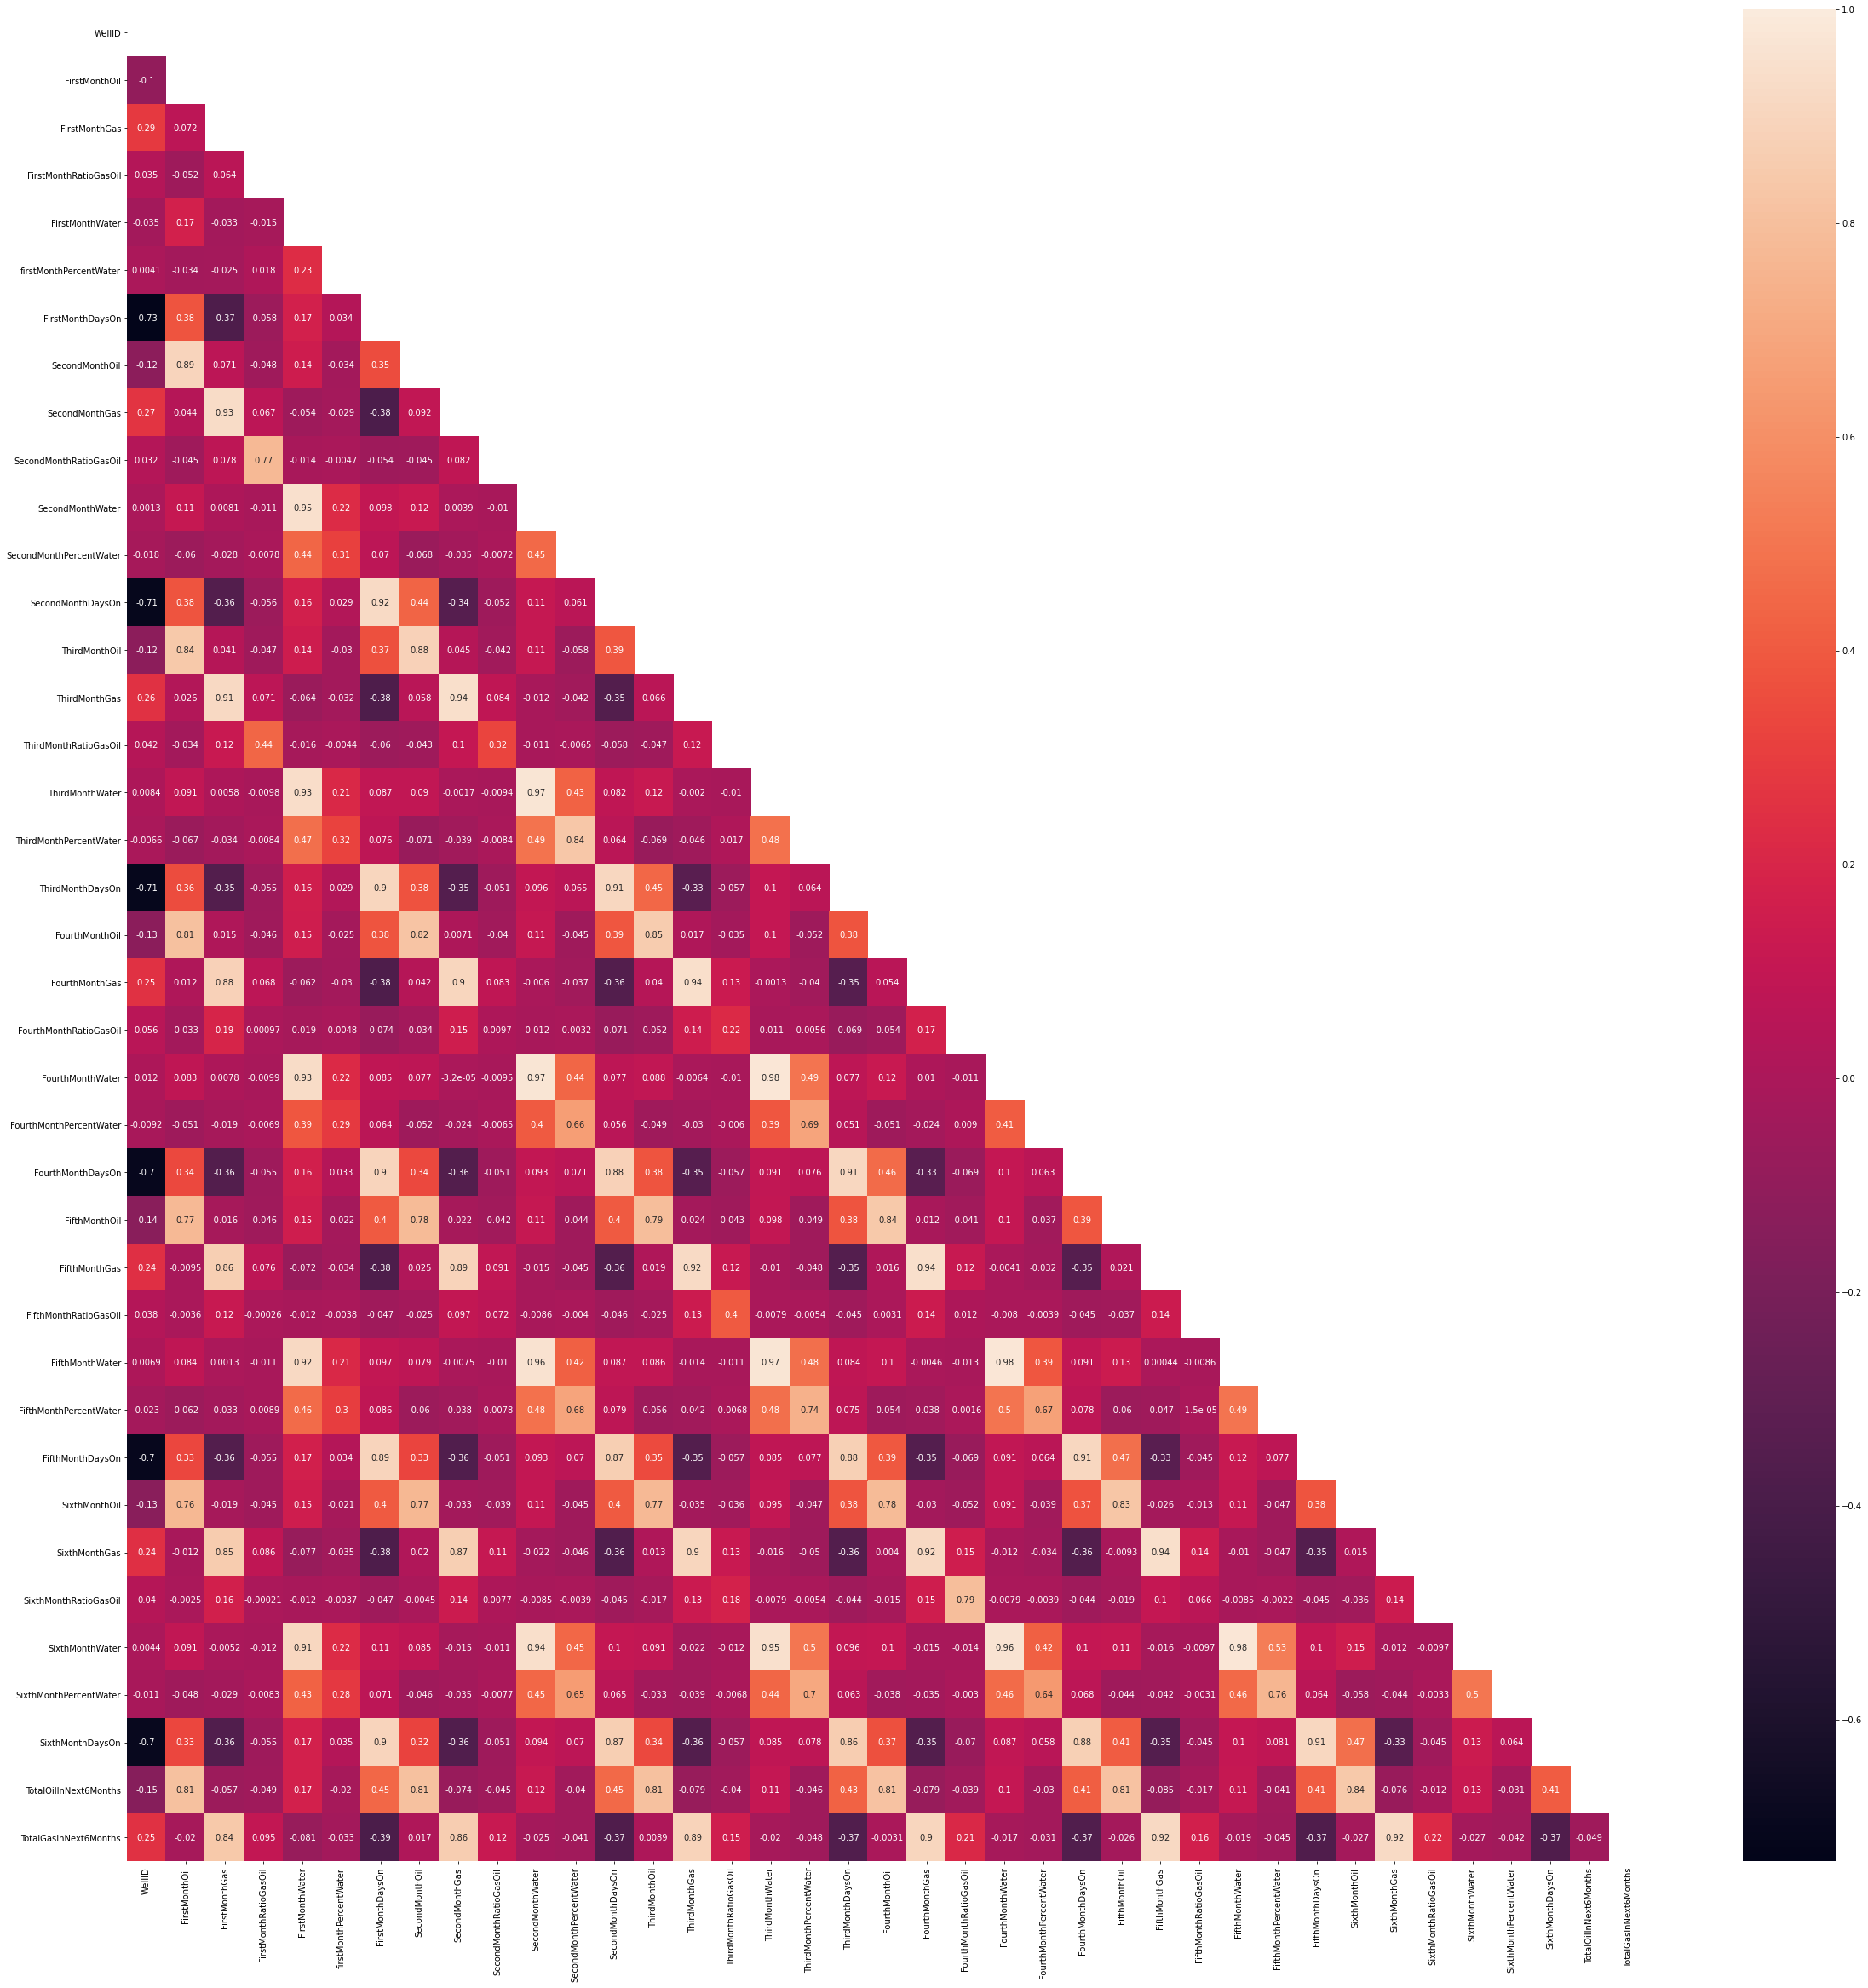

In [218]:
import seaborn as sns
corrmat= df.corr()
mask=np.zeros_like(corrmat,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
tp_corr=corrmat.index
plt.figure(figsize=(40,40))
g=sns.heatmap(df_train[tp_corr].corr(),mask=mask,annot=True)
plt.show()

In [235]:
df.corr(method ='pearson')['TotalOilInNext6Months']

WellID                    -0.145756
FirstMonthOil              0.808467
FirstMonthGas             -0.056532
FirstMonthRatioGasOil     -0.048772
FirstMonthWater            0.171723
firstMonthPercentWater    -0.020156
FirstMonthDaysOn           0.451399
SecondMonthOil             0.808568
SecondMonthGas            -0.073640
SecondMonthRatioGasOil    -0.044620
SecondMonthWater           0.118928
SecondMonthPercentWater   -0.040090
SecondMonthDaysOn          0.451845
ThirdMonthOil              0.807313
ThirdMonthGas             -0.079020
ThirdMonthRatioGasOil     -0.039655
ThirdMonthWater            0.105045
ThirdMonthPercentWater    -0.046138
ThirdMonthDaysOn           0.428905
FourthMonthOil             0.810906
FourthMonthGas            -0.078960
FourthMonthRatioGasOil    -0.038799
FourthMonthWater           0.101285
FourthMonthPercentWater   -0.029771
FourthMonthDaysOn          0.414565
FifthMonthOil              0.814790
FifthMonthGas             -0.085061
FifthMonthRatioGasOil     -0

As said before.. 

# Selecting only that columns that have high coorrelation coefficient with oil production

In [220]:
df=df[['WellID','FirstMonthOil', 'FirstMonthDaysOn', 'SecondMonthOil','SecondMonthDaysOn', 'ThirdMonthOil','ThirdMonthDaysOn', 'FourthMonthOil','FourthMonthDaysOn', 'FifthMonthOil','FifthMonthDaysOn', 'SixthMonthOil',     'SixthMonthDaysOn', 'TotalOilInNext6Months']]
df.head()            

,WellID,FirstMonthOil,FirstMonthDaysOn,SecondMonthOil,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthDaysOn,FourthMonthOil,FourthMonthDaysOn,FifthMonthOil,FifthMonthDaysOn,SixthMonthOil,SixthMonthDaysOn,TotalOilInNext6Months
0,5343,22672.0,30.0,12766.0,28.0,4990.0,10.0,11002.0,31.0,7141.0,22.0,6516.0,27.0,61152.0
1,5663,7919.0,20.0,5082.0,28.0,3168.0,25.0,2774.0,30.0,1925.0,24.0,2015.0,23.0,13172.0
2,7697,18653.0,30.0,13372.0,31.0,12189.0,30.0,10034.0,31.0,11982.0,30.0,9070.0,31.0,32858.0
3,7394,19784.0,30.0,17166.0,31.0,16525.0,30.0,13113.0,31.0,9202.0,31.0,6102.0,18.0,31784.0
4,7318,16157.0,30.0,12263.0,31.0,11019.0,30.0,14154.0,31.0,4046.0,14.0,0.0,1.0,40715.0


In [0]:
y=df[['TotalOilInNext6Months']]
X=df.iloc[:,:-1]

# we can see here that the scale of the values in the dataset is not the same, which may not be good at training.. let's scale **them**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=scaler.fit_transform(y)
X=scaler.fit_transform(X)
X=pd.DataFrame(X)

In [0]:
y=pd.DataFrame(y)

Spliting into train and test sets, but not too big test set 0.15 is good enough

In [0]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.15,random_state=42)

In [245]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(train_X,train_y)
print('Coeffs:' , regr.coef_)
print ('Intercept: ',regr.intercept_)

Coeffs: [[ 0.06276873  0.12457276  0.28361012  0.05599154  0.09192866  0.0581888
   0.03338357  0.10910316 -0.00337825  0.10682991  0.00089337  0.46917408
  -0.28964573]]
Intercept:  [6.12514604e-05]


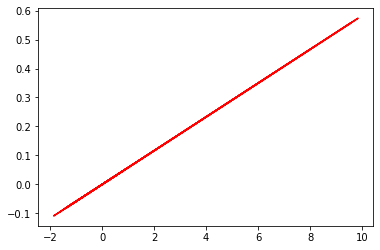

In [229]:
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0], '-r')

In [246]:
y_predict=regr.predict(test_X)
type(y_predict)

numpy.ndarray

# The error was measured as the Mean absolute error which equals sum of the absolute difference between test and predicted divided by number of points




In [247]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predict)) 

Mean Absolute Error: 0.25850727456204875


Hope you liked it..Stay safe ^_^